In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
data = pd.read_csv("museu_cleaned.csv")

In [4]:
# Gráfico por sexo
data['Qual é o seu sexo? '].value_counts().plot(kind='bar', title='Distribuição por Sexo')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.show()

# Gráfico por faixa etária
data['Qual é a sua idade? '].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Faixa Etária')
plt.ylabel('')
plt.show()

# Gráfico por escolaridade
data['Qual é a sua escolaridade? '].value_counts().plot(kind='bar', title='Distribuição por Escolaridade')
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.show()

# Ensure columns are stripped of extra whitespace
data.columns = data.columns.str.strip()

# Use the correct column name
column_name = '\nQual é sua renda familiar mensal? [A renda familiar é a soma de todos os ganhos financeiros dos membros de uma família que moram no mesmo endereço].'

# If the column name was modified, use the updated name
column_name = [col for col in data.columns if 'renda familiar mensal' in col.lower()][0]

# Plot the data
data[column_name].value_counts().plot(kind='bar', title='Distribuição por Renda Familiar')
plt.ylabel('Quantidade')
plt.show()



KeyError: 'Qual é o seu sexo? '

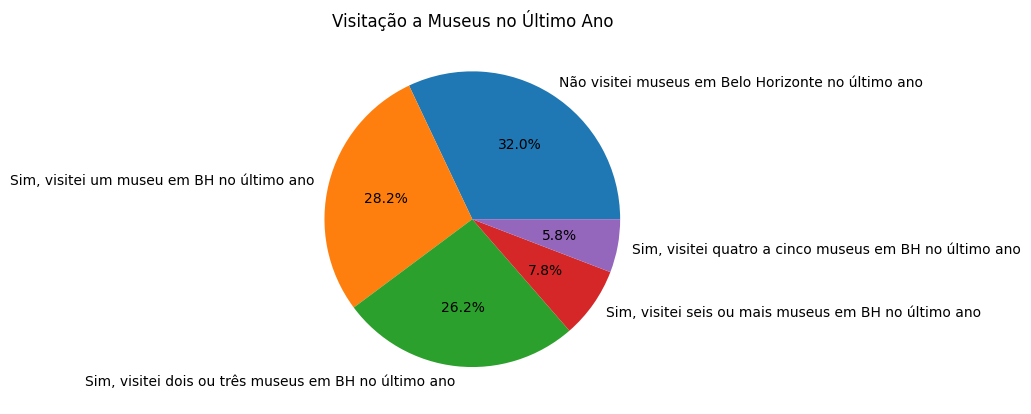

In [ ]:
# Frequência de visitas
data['Você visitou algum museu em Belo Horizonte no último ano?'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Visitação a Museus no Último Ano')
plt.ylabel('')
plt.show()




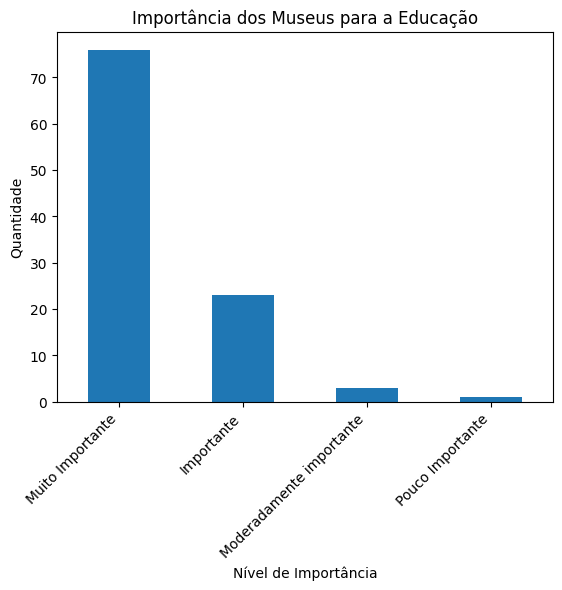

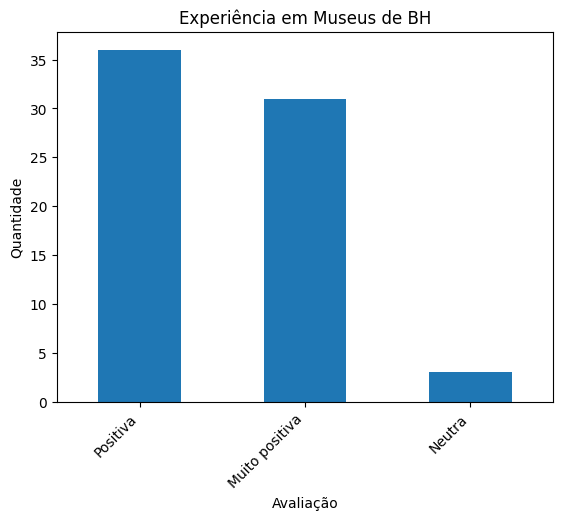

In [ ]:
# Importância dos museus
data['Para você, qual o nível de importância dos museus para a educação na sociedade?'].value_counts().plot(kind='bar', title='Importância dos Museus para a Educação')
plt.ylabel('Quantidade')
plt.xlabel('Nível de Importância')
plt.xticks(rotation=45, ha='right')
plt.show()

# Experiência em museus
data['Como você definiria a sua experiência em Museus em Belo Horizonte?'].value_counts().plot(kind='bar', title='Experiência em Museus de BH')
plt.ylabel('Quantidade')
plt.xlabel('Avaliação')
plt.xticks(rotation=45, ha='right')
plt.show()


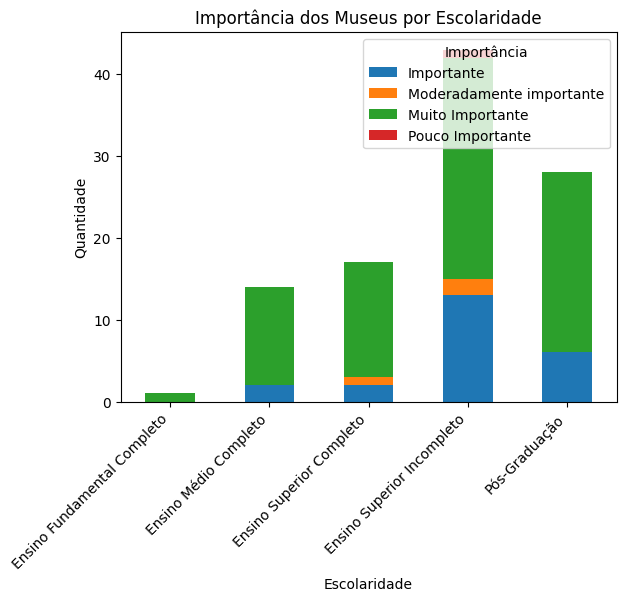

In [ ]:
# Cruzar Escolaridade x Importância
cross_edu_importance = data.groupby(['Qual é a sua escolaridade? ', 'Para você, qual o nível de importância dos museus para a educação na sociedade?']).size().unstack()

# Gráfico
cross_edu_importance.plot(kind='bar', stacked=True)
plt.title('Importância dos Museus por Escolaridade')
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Importância', loc='upper right')
plt.show()


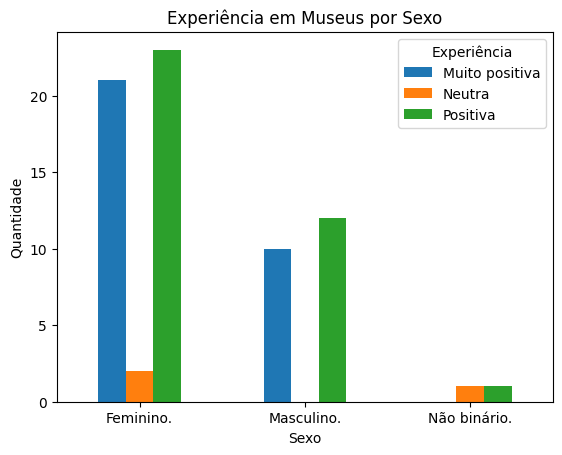

In [ ]:
# Cruzar Sexo x Experiência
cross_sex_experience = data.groupby(['Qual é o seu sexo? ', 'Como você definiria a sua experiência em Museus em Belo Horizonte?']).size().unstack()

# Gráfico
cross_sex_experience.plot(kind='bar')
plt.title('Experiência em Museus por Sexo')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(title='Experiência', loc='upper right')
plt.show()


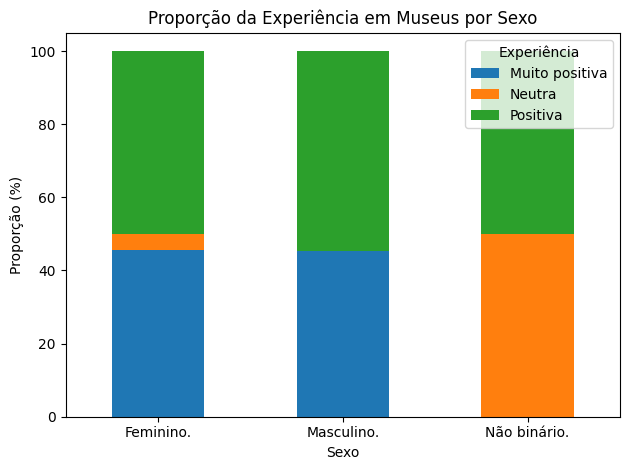

In [ ]:
# Reimportar bibliotecas necessárias


# Cruzar Sexo x Experiência e calcular as proporções
cross_sex_experience = data.groupby(['Qual é o seu sexo? ', 'Como você definiria a sua experiência em Museus em Belo Horizonte?']).size().unstack()

# Calcular as proporções por sexo
cross_sex_experience_percentage = cross_sex_experience.div(cross_sex_experience.sum(axis=1), axis=0) * 100

# Gráfico
cross_sex_experience_percentage.plot(kind='bar', stacked=True)
plt.title('Proporção da Experiência em Museus por Sexo')
plt.ylabel('Proporção (%)')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(title='Experiência', loc='upper right')
plt.tight_layout()
plt.show()


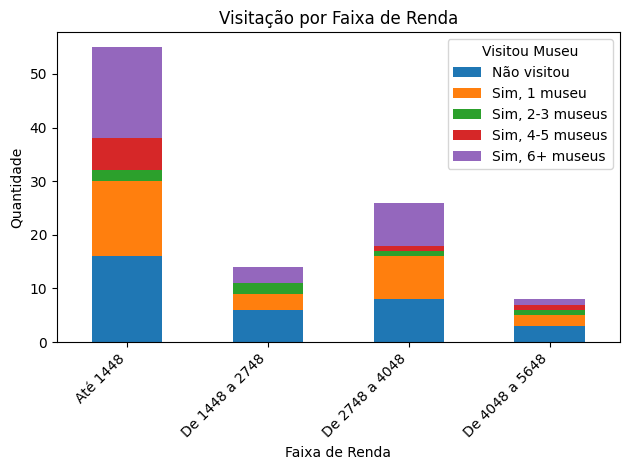

In [ ]:
# Cruzar Renda x Visitação
cross_income_visit = data.groupby(['\nQual é sua renda familiar mensal? [A renda familiar é a soma de todos os ganhos financeiros dos membros de uma família que moram no mesmo endereço].', 
                                   'Você visitou algum museu em Belo Horizonte no último ano?']).size().unstack()

# Gráfico
ax = cross_income_visit.plot(kind='bar', stacked=True)

# Ajustar título e rótulos
plt.title('Visitação por Faixa de Renda')
plt.ylabel('Quantidade')
plt.xlabel('Faixa de Renda')

# Definir n_barras como o número de barras no gráfico
n_barras = len(cross_income_visit.index)

# Definir manualmente os rótulos do eixo X para as faixas de renda
faixa_renda_labels = ['Até 1448', 'De 1448 a 2748', 'De 2748 a 4048', 'De 4048 a 5648', 'Acima de 5648']
plt.xticks(ticks=range(n_barras), labels=faixa_renda_labels[:n_barras], rotation=45, ha='right')

# Ajustar a legenda
plt.legend(title='Visitou Museu', labels=['Não visitou', 'Sim, 1 museu', 'Sim, 2-3 museus', 'Sim, 4-5 museus', 'Sim, 6+ museus'], loc='upper right')

# Exibir gráfico
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

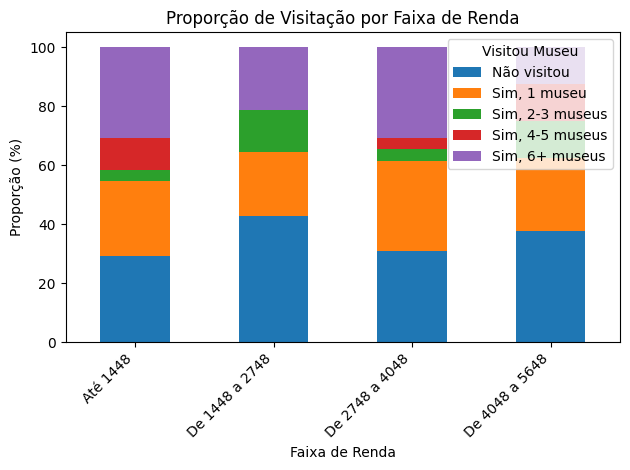

In [ ]:

# Cruzar Renda x Visitação
cross_income_visit = data.groupby(['\nQual é sua renda familiar mensal? [A renda familiar é a soma de todos os ganhos financeiros dos membros de uma família que moram no mesmo endereço].', 
                                   'Você visitou algum museu em Belo Horizonte no último ano?']).size().unstack()

# Calcular as proporções por faixa de renda
cross_income_visit_percentage = cross_income_visit.div(cross_income_visit.sum(axis=1), axis=0) * 100

# Ajustar os rótulos do eixo X para melhor legibilidade
plt.figure(figsize=(10, 6))

# Plotar o gráfico com os dados
cross_income_visit_percentage.plot(kind='bar', stacked=True)

# Ajustar o título e os rótulos do gráfico
plt.title('Proporção de Visitação por Faixa de Renda')
plt.ylabel('Proporção (%)')
plt.xlabel('Faixa de Renda')

# Verificar o número de barras no gráfico
n_barras = len(cross_income_visit_percentage.index)

# Definir manualmente os rótulos do eixo X para as faixas de renda
faixa_renda_labels = ['Até 1448', 'De 1448 a 2748', 'De 2748 a 4048', 'De 4048 a 5648', 'Acima de 5648']

# Ajuste de rótulos do eixo X
plt.xticks(ticks=range(n_barras), labels=faixa_renda_labels[:n_barras], rotation=45, ha='right')

# Ajustar a posição e formato da legenda
plt.legend(title='Visitou Museu',  labels=['Não visitou', 'Sim, 1 museu', 'Sim, 2-3 museus', 'Sim, 4-5 museus', 'Sim, 6+ museus'], loc='upper right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


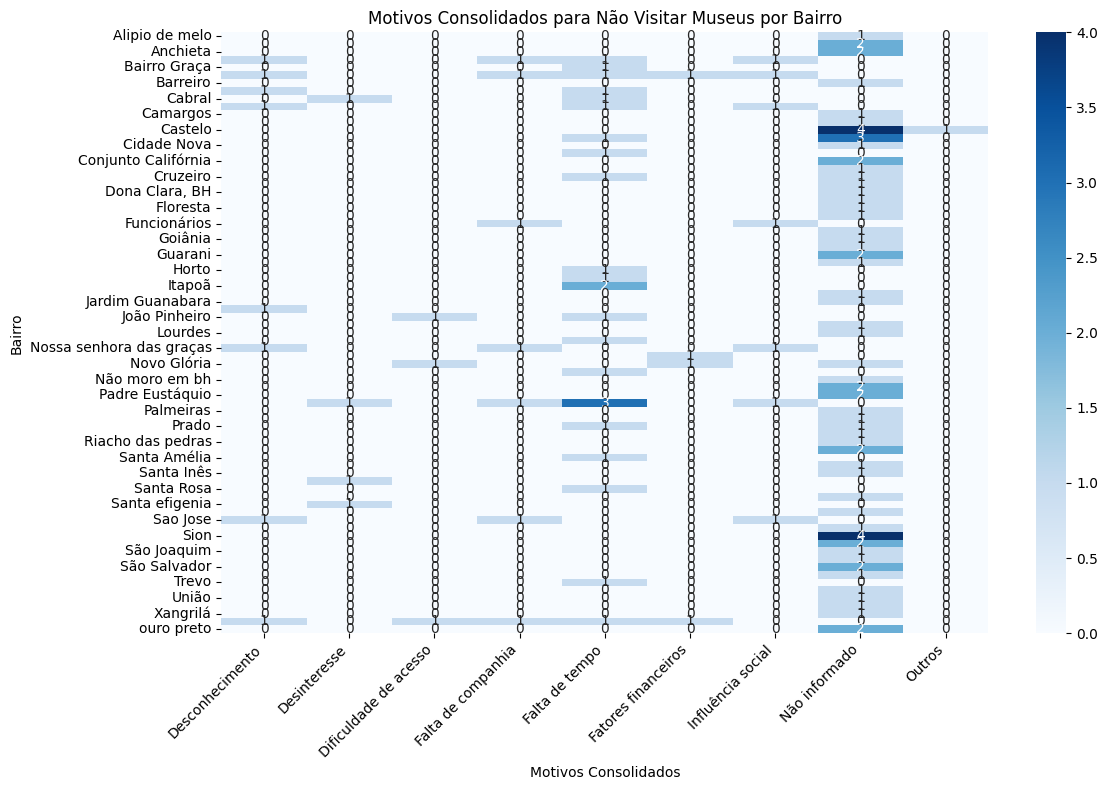

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir os nomes das colunas relevantes no DataFrame limpo
motivos_coluna = 'Caso_você_não_tenha_visitado_museus_em_Belo_Horizonte_no_último_ano_marque_uma_ou_mais_alternativas_que_indiquem_os_motivos'
bairro_coluna = 'Em_qual_bairro_você_reside'

# Filtrar o DataFrame para as colunas de interesse, removendo valores nulos
data_filtrada = data[[bairro_coluna, motivos_coluna]].dropna()

# Explodir os motivos em linhas separadas
motivos_exploded = data_filtrada[motivos_coluna].str.split(', ').explode()

# Separar respostas combinadas por ponto-e-vírgula
motivos_separados = motivos_exploded.str.split(';').explode()

# Repetir os bairros para alinhá-los com os motivos explodidos
bairros_repetidos = data_filtrada[bairro_coluna].repeat(motivos_separados.groupby(level=0).size()).reset_index(drop=True)

# Criar DataFrame consolidado com bairros e motivos separados
data_consolidada = pd.DataFrame({
    bairro_coluna: bairros_repetidos,
    'Motivos Consolidados': motivos_separados.reset_index(drop=True)
})

# Mapear motivos para categorias consolidadas
categoria_map = {
    'Falta de tempo': 'Falta de tempo',
    'Não conheço nenhum museu (falta divulgação)': 'Desconhecimento',
    'Não gosto de museus': 'Desinteresse',
    'Falta dinheiro': 'Fatores financeiros',
    'Tenho dificuldade para acessar museus (transporte e outros)': 'Dificuldade de acesso',
    'Não tenho companhia': 'Falta de companhia',
    'Meus amigos/familiares não vão a museus': 'Influência social',
    'Oportunidade': 'Outros'
}

# Substituir motivos pela categoria consolidada
data_consolidada['Motivos Consolidados'] = data_consolidada['Motivos Consolidados'].replace(categoria_map)

# Agrupar dados por bairro e motivo consolidado, somando as ocorrências
data_grouped = data_consolidada.groupby([bairro_coluna, 'Motivos Consolidados']).size().unstack(fill_value=0)

# Gerar o gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_grouped, annot=True, fmt="d", cmap="Blues")
plt.title('Motivos Consolidados para Não Visitar Museus por Bairro')
plt.xlabel('Motivos Consolidados')
plt.ylabel('Bairro')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


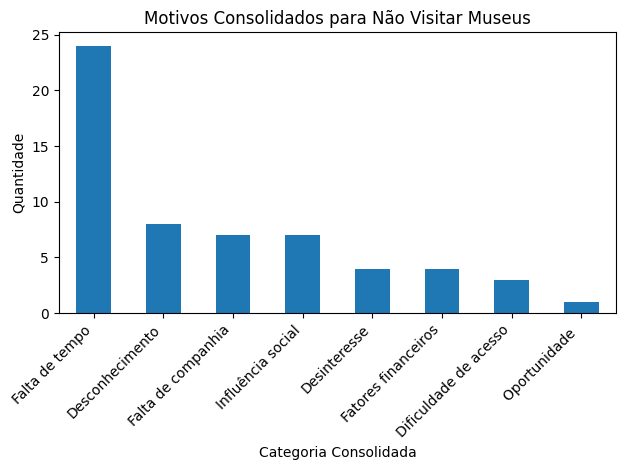

In [ ]:
# Extrair a coluna de motivos (ajustar o nome da coluna conforme a base)
motivos_coluna = 'Caso você não tenha visitado museus em Belo Horizonte no último ano, marque uma ou mais alternativas que indiquem os motivos.  '

# Remover valores nulos e consolidar múltiplas respostas em uma string
motivos = data[motivos_coluna].dropna()

# Explodir múltiplas respostas em linhas separadas
alternativas_exploded = motivos.str.split(', ').explode()

# Dividir respostas combinadas por ponto-e-vírgula em linhas separadas
motivos_separados = alternativas_exploded.str.split(';').explode()

# Mapear respostas para categorias consolidadas
categoria_map = {
    'Falta de tempo': 'Falta de tempo',
    'Não conheço nenhum museu (falta divulgação)': 'Desconhecimento',
    'Não gosto de museus': 'Desinteresse',
    'Falta dinheiro': 'Fatores financeiros',
    'Tenho dificuldade para acessar museus (transporte e outros)': 'Dificuldade de acesso',
    'Não tenho companhia': 'Falta de companhia',
    'Meus amigos/familiares não vão a museus': 'Influência social',
    'Oportunidade': 'Outros'
}

# Consolidar os motivos
motivos_consolidados = motivos_separados.replace(categoria_map)

# Contar ocorrências de cada categoria consolidada
contagem_consolidada = motivos_consolidados.value_counts()

# Gerar o gráfico
import matplotlib.pyplot as plt

contagem_consolidada.plot(kind='bar', title='Motivos Consolidados para Não Visitar Museus')
plt.ylabel('Quantidade')
plt.xlabel('Categoria Consolidada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


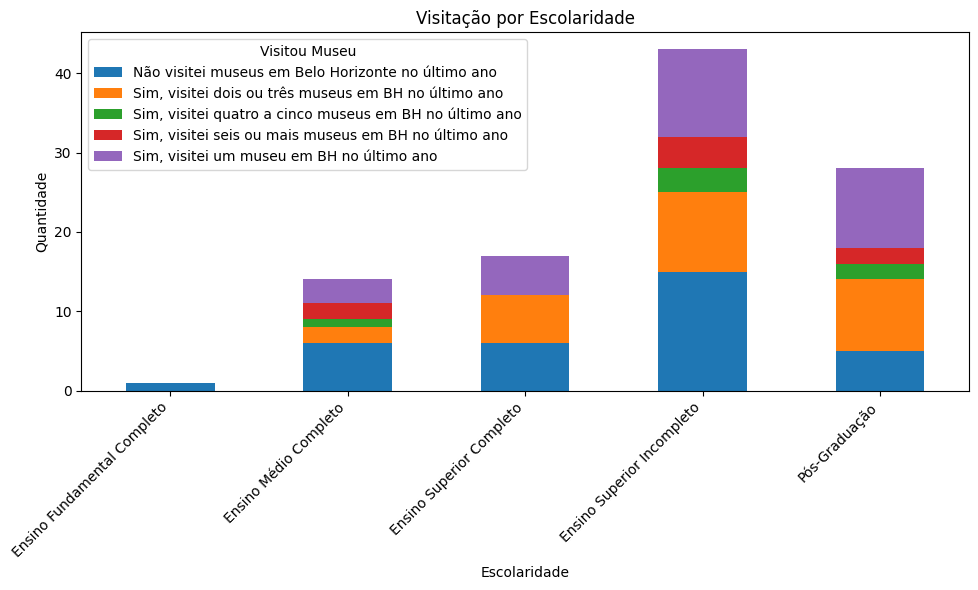

In [ ]:
# Contar visitas por escolaridade
visita_escolaridade = data.groupby(['Qual_é_a_sua_escolaridade', 'Você_visitou_algum_museu_em_Belo_Horizonte_no_último_ano']).size().unstack(fill_value=0)

# Criar gráfico de barras empilhadas
visita_escolaridade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Visitação por Escolaridade')
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visitou Museu')
plt.tight_layout()
plt.show()


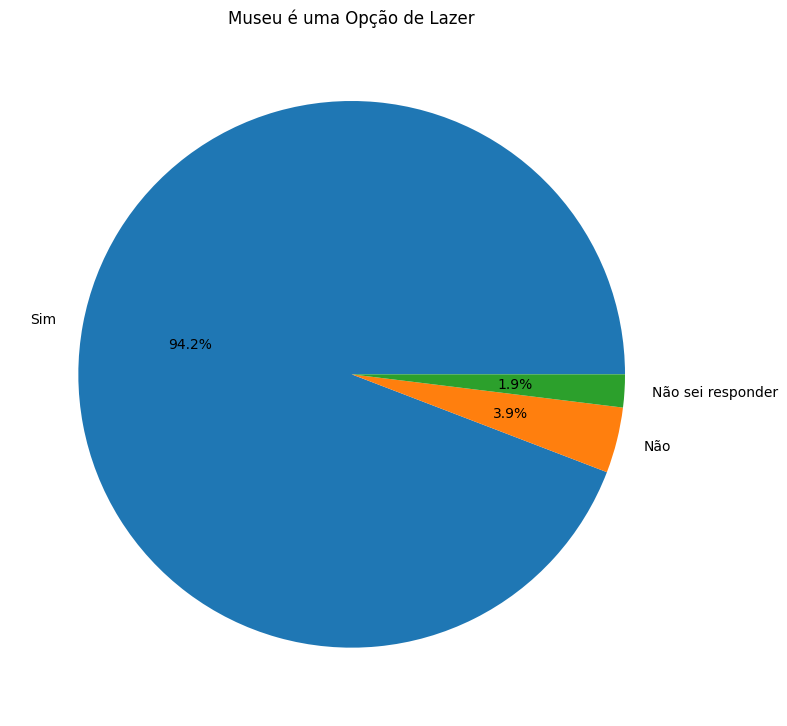

In [ ]:
# Contar respostas sobre museu como opção de lazer
lazer_opcao = data['Você_considera_que_uma_visita_ao_Museu_é_uma_opção_de_lazer_para_passar_tempo_com_a_família_ou_amigos'].value_counts()

# Criar gráfico de pizza
lazer_opcao.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Museu é uma Opção de Lazer')
plt.ylabel('')
plt.tight_layout()
plt.show()


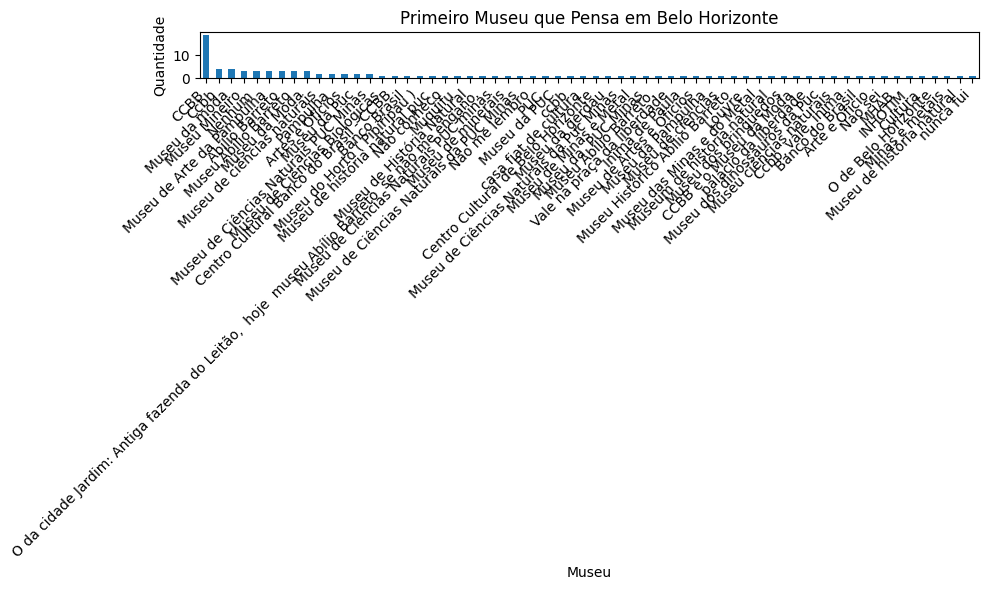

In [ ]:
# Contar o primeiro museu que os participantes pensam
primeiro_museu = data['Quando_você_pensa_nos_Museus_de_Belo_Horizonte_qual_o_primeiro_que_você_lembra'].value_counts()

# Criar gráfico de barras
primeiro_museu.plot(kind='bar', figsize=(10, 6))
plt.title('Primeiro Museu que Pensa em Belo Horizonte')
plt.ylabel('Quantidade')
plt.xlabel('Museu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\bruna\AppData\Local\Temp\ipykernel_19416\1799132433.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


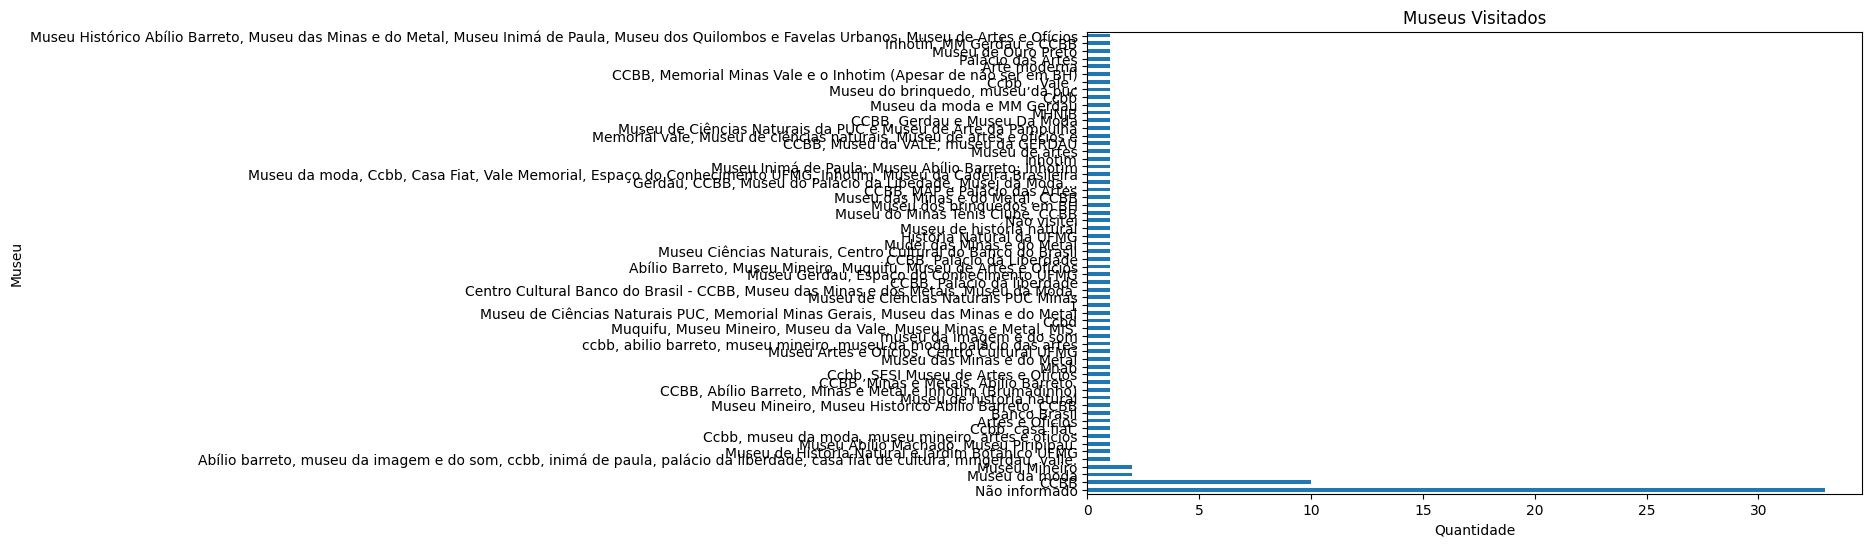

In [ ]:
# Contar museus visitados
museu_visitado = data['Cite_um_ou_mais_museus_de_Belo_Horizonte_que_você_se_lembra_ter_visitado_no_último_ano'].value_counts()

# Criar gráfico de barras horizontais
museu_visitado.plot(kind='barh', figsize=(10, 6))
plt.title('Museus Visitados')
plt.xlabel('Quantidade')
plt.ylabel('Museu')
plt.tight_layout()
plt.show()


) missing from font(s) DejaVu Sans.pykernel_19416\3433269535.py:10: UserWarning: Glyph 13 (
  plt.tight_layout()
C:\Users\bruna\AppData\Local\Temp\ipykernel_19416\3433269535.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
) missing from font(s) DejaVu Sans.es\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


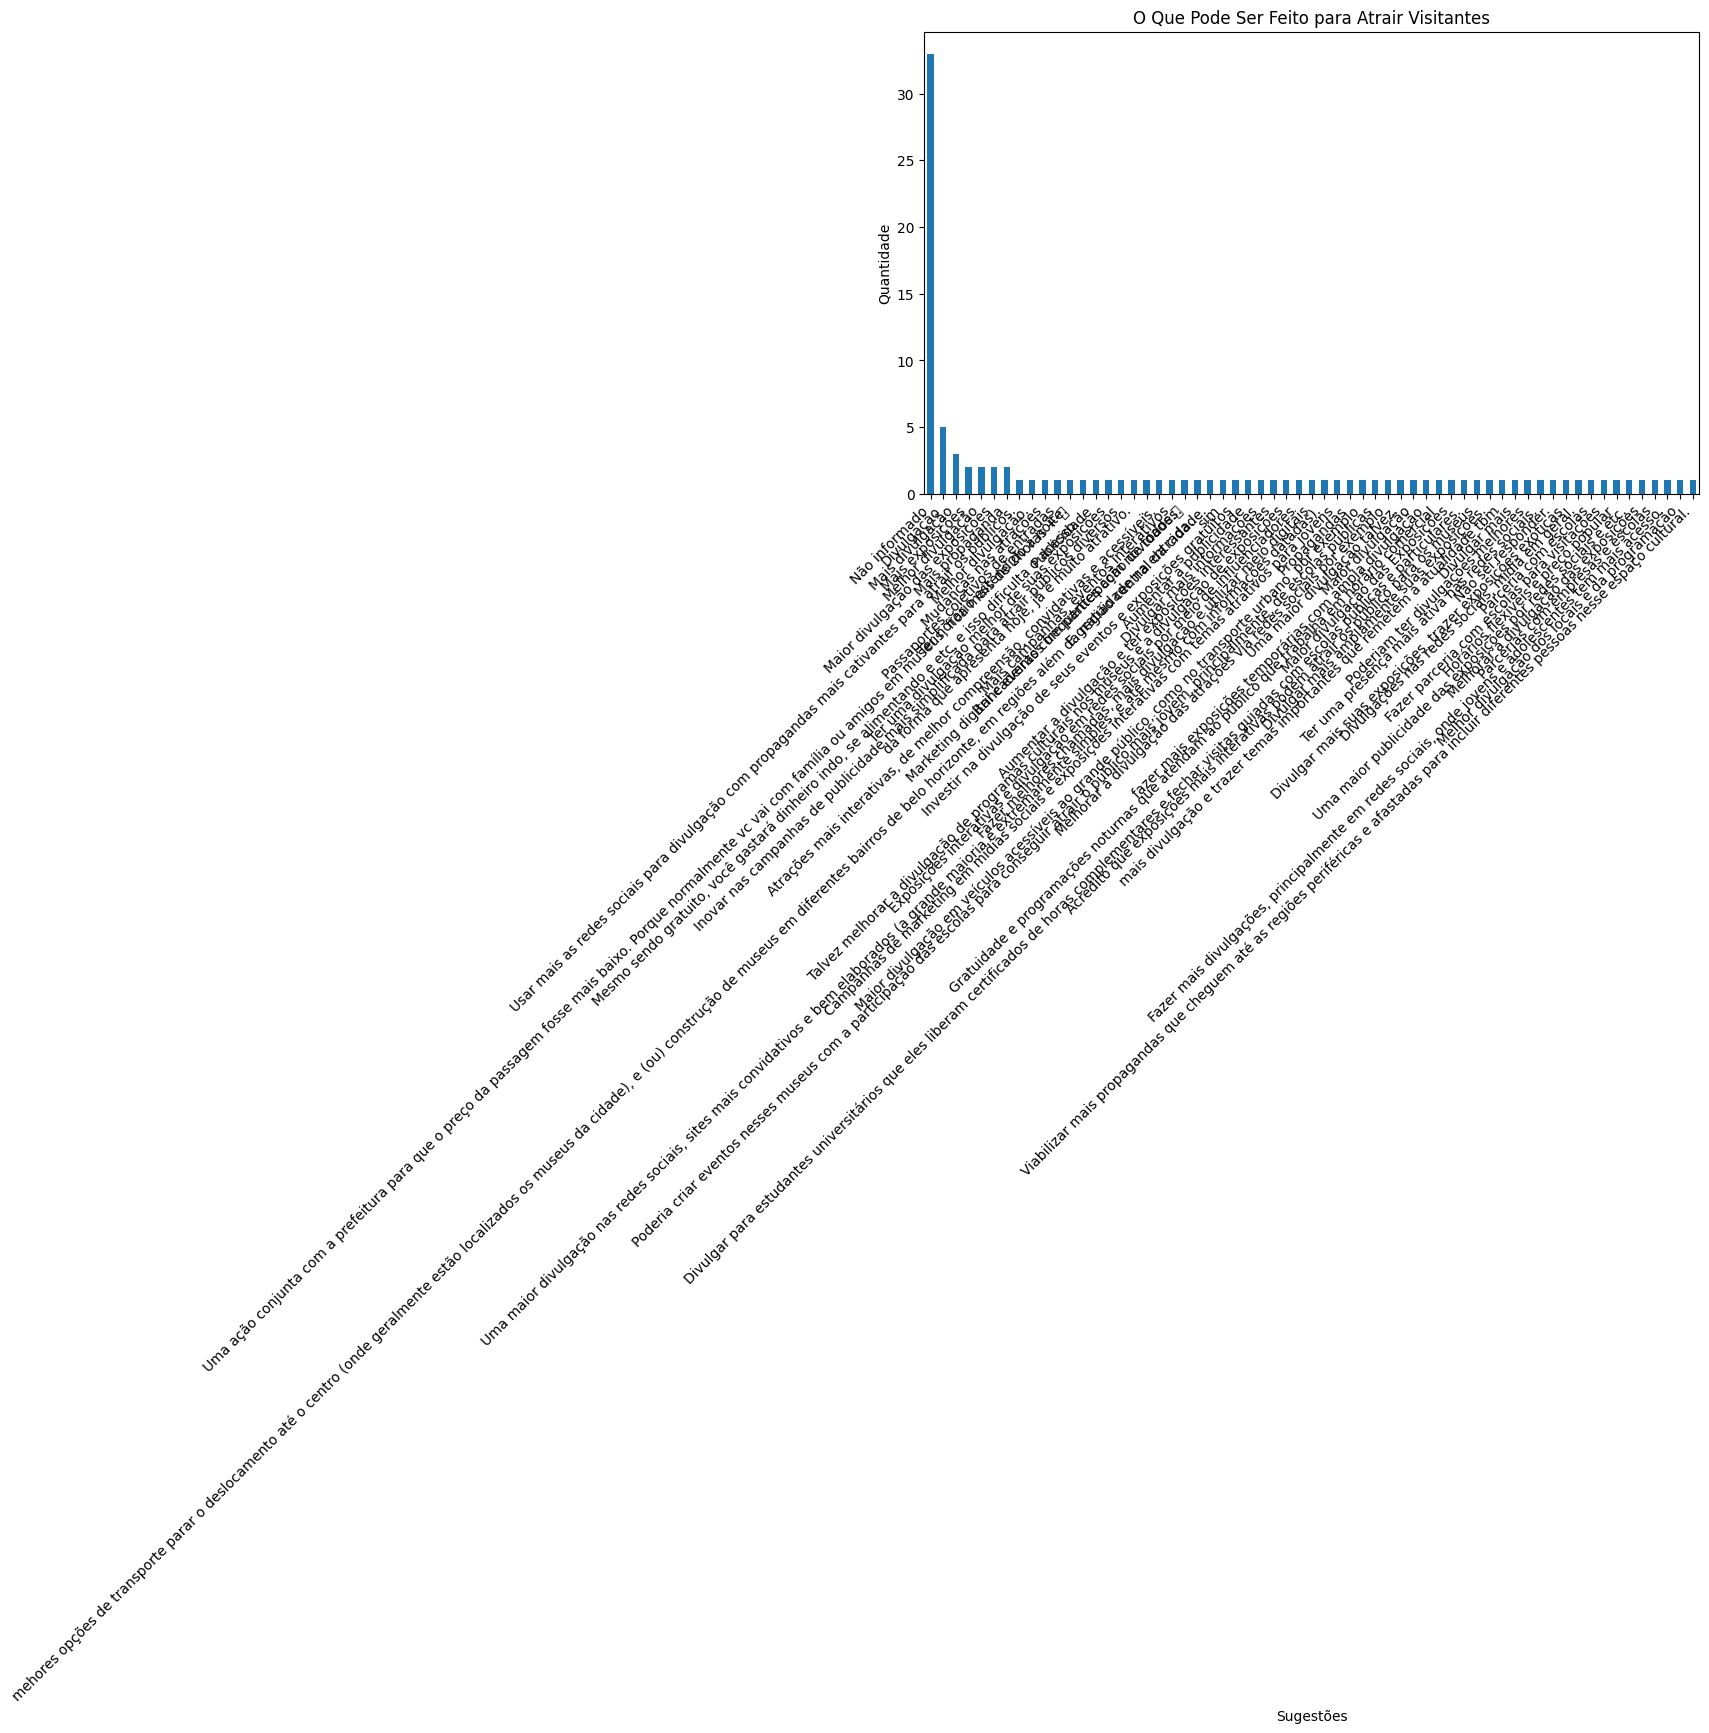

In [ ]:
# Explodir sugestões para atrair visitantes
atrair_visitantes = data['Na_sua_opinião_o_que_os_museus_em_Belo_Horizonte_poderiam_fazer_para_atrair_mais_visitantes'].str.split(';').explode().value_counts()

# Criar gráfico de barras
atrair_visitantes.plot(kind='bar', figsize=(10, 6))
plt.title('O Que Pode Ser Feito para Atrair Visitantes')
plt.ylabel('Quantidade')
plt.xlabel('Sugestões')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


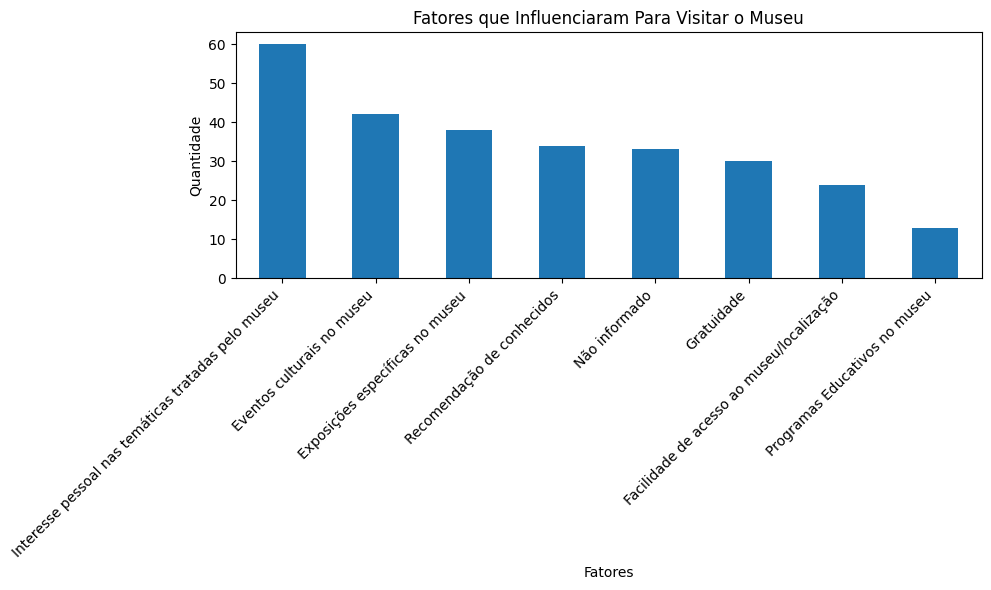

In [ ]:
# Explodir fatores que influenciaram a visita
influencia_visita = data['Quais_fatores_influenciam_ou_influenciariam_sua_decisão_de_visitar_um_museu_em_Belo_Horizonte'].str.split(';').explode().value_counts()

# Criar gráfico de barras
influencia_visita.plot(kind='bar', figsize=(10, 6))
plt.title('Fatores que Influenciaram Para Visitar o Museu')
plt.ylabel('Quantidade')
plt.xlabel('Fatores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


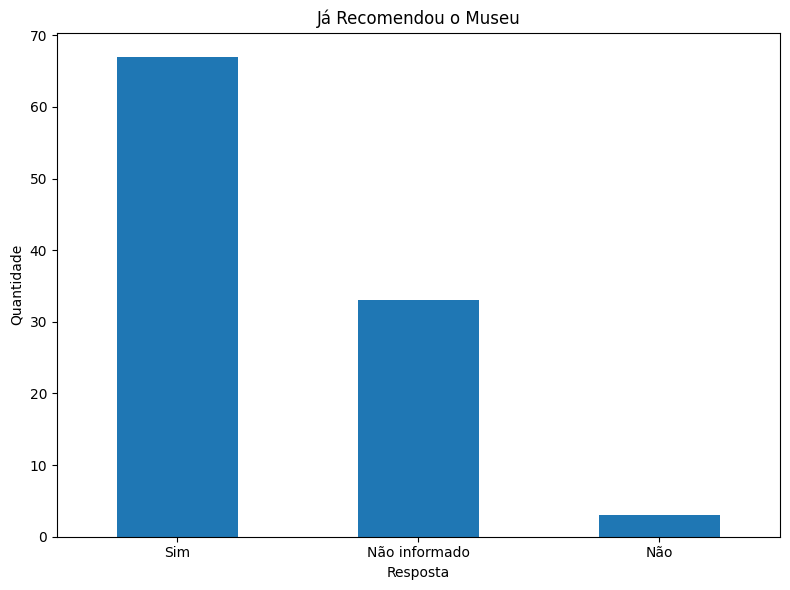

In [ ]:
# Contar respostas sobre recomendação
recomendou_museu = data['Você_já_recomendou_a_visitação_a_museus_de_Belo_Horizonte_para_conhecidos'].value_counts()

# Criar gráfico de barras
recomendou_museu.plot(kind='bar', figsize=(8, 6))
plt.title('Já Recomendou o Museu')
plt.ylabel('Quantidade')
plt.xlabel('Resposta')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


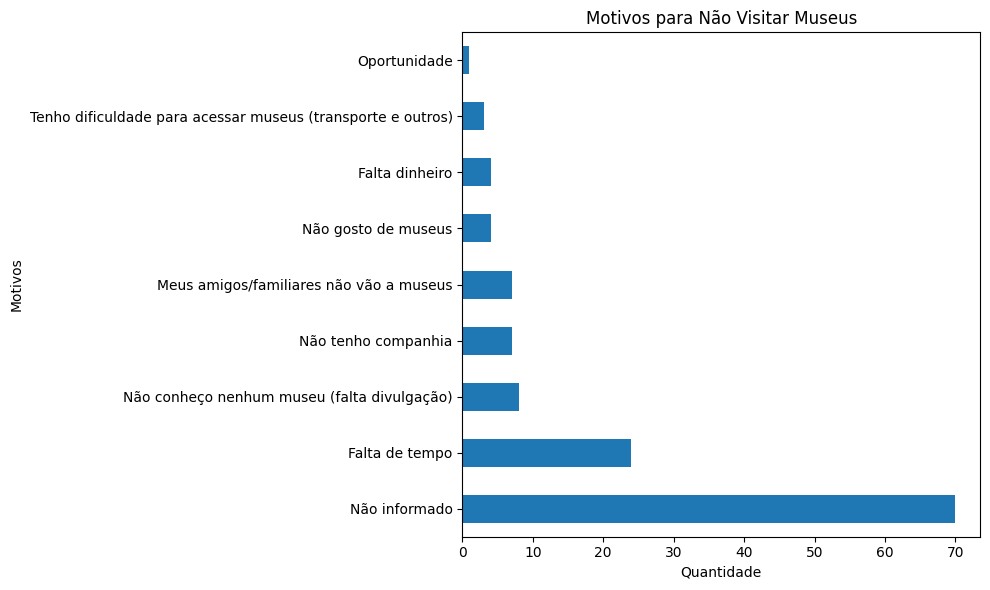

In [ ]:
# Explodir motivos para não visitar museus
motivos_nao_visita = data['Caso_você_não_tenha_visitado_museus_em_Belo_Horizonte_no_último_ano_marque_uma_ou_mais_alternativas_que_indiquem_os_motivos'].str.split(';').explode().value_counts()

# Criar gráfico de barras horizontais
motivos_nao_visita.plot(kind='barh', figsize=(10, 6))
plt.title('Motivos para Não Visitar Museus')
plt.xlabel('Quantidade')
plt.ylabel('Motivos')
plt.tight_layout()
plt.show()


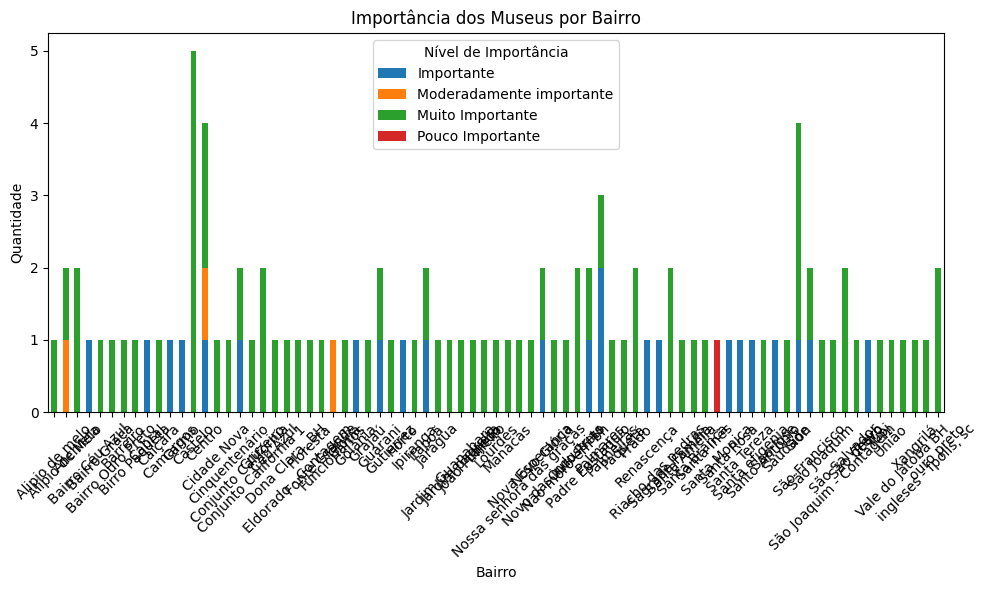

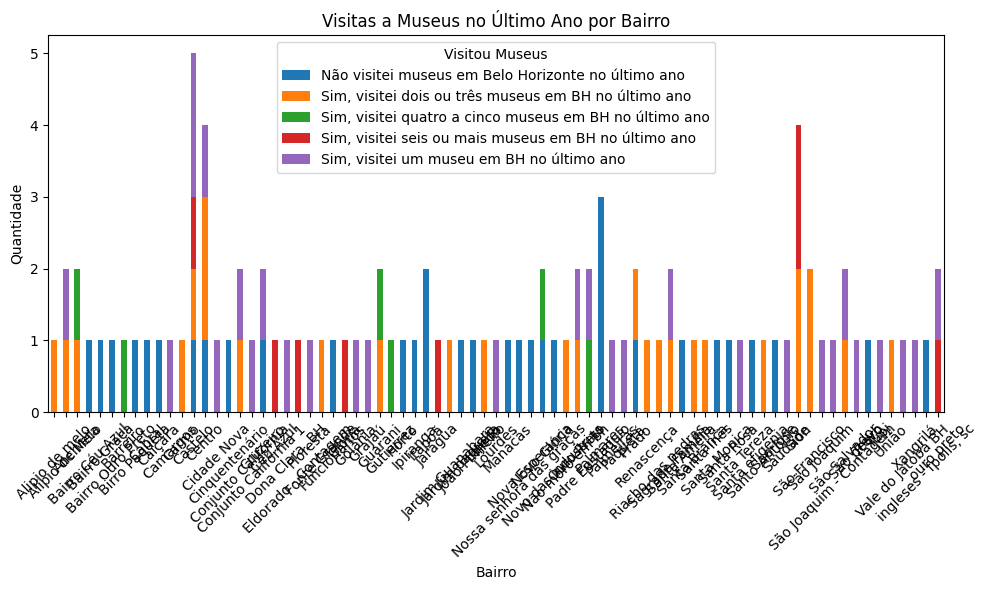

In [7]:
import matplotlib.pyplot as plt

# Substituir "Em_qual_bairro_você_reside" por uma variável de interesse
bairro_column = 'Em_qual_bairro_você_reside'


# Gráfico 4: Bairro x Importância dos Museus
data.groupby([bairro_column, 'Para_você_qual_o_nível_de_importância_dos_museus_para_a_educação_na_sociedade']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Importância dos Museus por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Quantidade")
plt.legend(title="Nível de Importância")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 5: Bairro x Visitas a Museus
data.groupby([bairro_column, 'Você_visitou_algum_museu_em_Belo_Horizonte_no_último_ano']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Visitas a Museus no Último Ano por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Quantidade")
plt.legend(title="Visitou Museus")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bairros classificados como 'Outros':
Bairro Normalizado
Eldorado                 1
Não Moro Em Bh           1
Riacho das Pedras        1
Lajedo                   1
Goiânia                  1
Ingleses - Fpolis, Sc    1
Name: count, dtype: int64


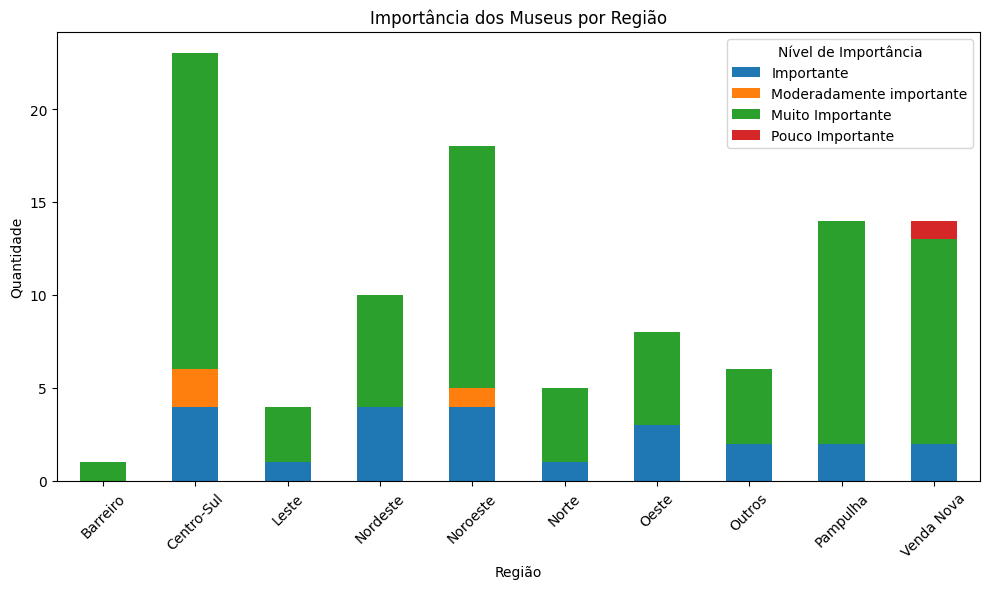

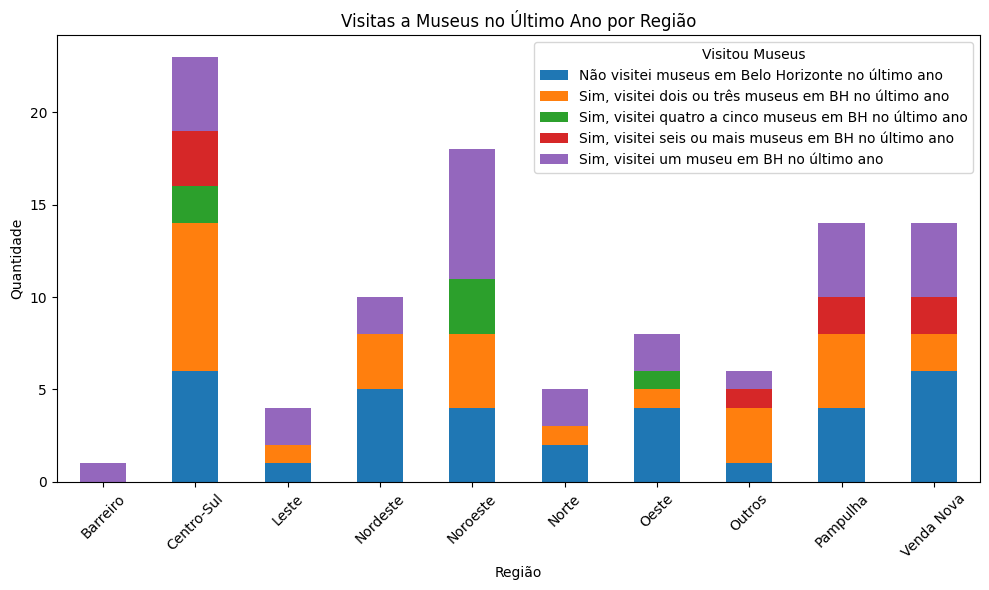

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from rapidfuzz import process  # Opcional, apenas se usar similaridade



# Dicionário para normalizar os nomes dos bairros
normalizacao = {
    "Bairro Ouro Preto": "Ouro Preto",
    "Jardim Paqueta": "Paquetá",
    "Não Moro Em Bh": "Não mora em BH",
    "Não Mora Em Bh": "Não mora em BH",
    "Vale do Jatobá BH": "Vale do Jatobá",
    "Guarani": "Guarani",
    "Palmares": "Palmares",
    "Nossa Senhora Das Graças": "Nossa Senhora das Graças",
    "Cinquentenário": "Cinquentenário",
    "Gloria": "Glória",
    "Caiçara": "Caiçara",
    "Riacho das Pedras": "Riacho das Pedras",
    "Goiânia": "Goiânia",
    "Sao Jose": "São José",
    "Lajedo": "Lajedo",
    "Birro Paqueta": "Paquetá",
    "Saudade": "Saudade"
}

# Normaliza os bairros no DataFrame
data['Bairro Normalizado'] = (
    data['Em_qual_bairro_você_reside']
    .str.strip()
    .str.lower()
    .replace(normalizacao)
    .str.title()
)

# Dicionário com bairros por região
bairros_por_regiao = {
    "Centro-Sul": [
        "Centro", "Sion", "Cruzeiro", "Anchieta", "Santo Antônio", "Carmo", "Funcionários", 
        "Lourdes", "Santa Efigênia", "São Pedro", "Prado", "Gutierrez"
    ],
    "Oeste": [
        "Nova Esperança", "Palmeiras", "Barreiro", "Fonte Grande", "Novo das Indústrias", 
        "Camargos", "Horto", "Trevo"
    ],
    "Nordeste": [
        "Santa Inês", "Santa Tereza", "Cidade Nova", "União", "Ipiranga", "Renascença", 
        "Bairro Graça", "Palmares"
    ],
    "Noroeste": [
        "Padre Eustáquio", "Conjunto Califórnia", "Alípio de Melo", "Manacás", "Novo Glória", 
        "Xangrilá", "Grajaú", "João Pinheiro"
    ],
    "Pampulha": [
        "Castelo", "Itapoã", "São Francisco", "Paquetá", "Santa Branca", "Dona Clara", 
        "Jaraguá", "Birro Paqueta"
    ],
    "Venda Nova": [
        "Céu Azul", "Santa Mônica", "Santa Amélia", "São Salvador", "Tupi", "Ouro Preto", "Jardim Paqueta", "Sao Jose"
    ],
    "Leste": [
        "Sagrada Família", "Floresta", "Santa Rosa"
    ],
    "Norte": [
        "Cabral", "Jardim Guanabara", "São Joaquim", "Nossa Senhora Das Graças"
    ],
    "Barreiro":[
        "Vale do Jatobá BH" 
    ],
    "Outros": [
        "Não mora em BH", "Goiânia", "Riacho das Pedras", "Eldorado", "Vale do Jatobá BH", 
        "Lajedo"
    ]
}
bairros_por_regiao["Noroeste"].extend(["Guarani", "Caiçara", "Saudade"])
bairros_por_regiao["Centro-Sul"].extend(["Cinquentenário", "Glória"])
bairros_por_regiao["Outros"].extend(["Não mora em BH", "Goiânia", "Vale do Jatobá", "Lajedo"])


# Função para mapear bairros para regiões
def mapear_regiao(bairro):
    for regiao, bairros in bairros_por_regiao.items():
        if bairro in bairros:
            return regiao
    return "Outros"

# Opcional: Corrigir por similaridade
# Função para corrigir por similaridade
def corrigir_por_similaridade(bairro, lista_bairros):
    resultado = process.extractOne(bairro, lista_bairros)
    if resultado is not None:
        correspondencia, score = resultado[0], resultado[1]
        if score > 80:  # Ajuste o limite de confiança, se necessário
            return correspondencia
    return bairro  # Retorna o original se nenhuma correspondência for encontrada

# Lista de todos os bairros conhecidos
lista_bairros_todos = sum(bairros_por_regiao.values(), [])

# Aplica a correção por similaridade (opcional)
data['Bairro Normalizado'] = data['Bairro Normalizado'].apply(lambda b: corrigir_por_similaridade(b, lista_bairros_todos))

# Mapeia as regiões
data['Região'] = data['Bairro Normalizado'].apply(mapear_regiao)

# Diagnóstico de bairros classificados como "Outros"
outros_bairros = data[data['Região'] == "Outros"]['Bairro Normalizado'].value_counts()
print("Bairros classificados como 'Outros':")
print(outros_bairros)

# Gráfico 1: Importância dos Museus por Região
data.groupby(['Região', 'Para_você_qual_o_nível_de_importância_dos_museus_para_a_educação_na_sociedade']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title("Importância dos Museus por Região")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.legend(title="Nível de Importância")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Visitas a Museus no Último Ano por Região
data.groupby(['Região', 'Você_visitou_algum_museu_em_Belo_Horizonte_no_último_ano']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title("Visitas a Museus no Último Ano por Região")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.legend(title="Visitou Museus")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
